Copyright (c) 2019 OERCompBiomed (UiB)

<h1 style="color:blue">Pandas</h1>

# Table of contents
1. [Import libraries](#introduction)
2. [PART 1](#part1)
    1. [Iris flower data](#irisdata)
    2. [Data exploration in pandas](#dataexploration)
    3. [Accessing specific rows and columns](#accessing)
    4. [Manipulating dataframes](#manipulating)
    5. [Statistics using Pandas](#statistics)
3. [PART 2 - extra stuff](#part2)
    1. [Object creation](#objectcreation)
    2. [Viewing Data](#viewing)
    3. [Selection](#selection)
    4. [Missing data](#missing)
    5. [Operation](#operations)
    6. [Merging ](#merging)
    7. [Grouping ](#grouping)
    8. [Reshaping ](#reshaping)
    9. [Time Series](#timeseries)
    10. [Categoricals](#categoricals)
    11. [Plotting](#plotting)
    12. [Getting Data In/Out](#datainout)
    13. [Going further](#going)
    


<div class='alert alert-info'>

NOTE: The original notebook on Github might change over the time, and we recommend that you make a copy of our notebooks before you are editing them. In this respect you might adopt the naming convention my_<'name_of_notebook'>.ipynb, e.g. `my_2_pandas_basics.ipynb`

**You are encouraged to experiment with all our code!**

## Import libraries<a name="introduction"></a>

By default Python has many available functions and classes. Some of these functions are only accessible through importing specialized modules. **Library** is an umbrella term referring to reusable chunk of code. Let's say you wish to do math operations. We use the `import` to make the math functions available: 

`import math`

__[*Pandas*](https://pandas.pydata.org)__ is the premier Python package for data analysis. Pandas is built around the concept of *series* (akin to Numpy vectors) and *data frames* (akin to Numpy matrices). Unlike their Numpy counterparts, Pandas has a rich API that often makes series and data frames more convenient to work with.

First though, let's import Pandas. Conventionally it is given the name `pd`.

In [ ]:
# This is how we usually import pandas
import pandas as pd 

# We can also import specific functions in a library: 
from pandas import DataFrame, read_csv

Now that pandas is imported, its functions can be used like this:

`pd.functionName()`

In [ ]:
# Import all other helpful libraries needed for the tutorial

import seaborn as sns

import numpy as np #this is how we usually import numpy
import sys #only needed to determine Python version number

In [ ]:
# Supress some warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# We can print versions of packages
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)
print('Seaborn version ' + sns.__version__)

# PART I <a name="part1"></a>

## Iris flower data <a name="irisdata"></a>
https://archive.ics.uci.edu/ml/datasets/iris

In [ ]:
# load image
from IPython.display import Image
Image('./assets/iris_data_intro.png', width=900)

**Data Set Information:**

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

**Attribute Information:**

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: <br>
-- Iris Setosa <br>
-- Iris Versicolour <br>
-- Iris Virginica

Read local data:

In [ ]:
iris = pd.read_csv('./data/iris.data')

# Data exploration in Pandas <a name="dataexploration"></a>

The first thing we usually do after loading a dataframe (i.e. table), is to inspect it using the following methods.

In [ ]:
iris.shape

This means we have 150 samples (rows) and 5 features per sample (columns). What are those features?

In [ ]:
for col in iris.columns:
    print(col)

## Display your samples
Display the 5 first rows using `df.head()`

In [ ]:
iris.head()

or the 10 first

In [ ]:
iris.head(10)

By now you should know that the input to the `head` function is an optional parameter which defaults to 5. You can confirm this by writing `iris.head()` and pressing Shift+Tab.

or the 5 last using `df.tail()`

In [ ]:
iris.tail()

A summary can be presented with `df.info()`.

In [ ]:
iris.info()

Here you see the data types each column contains too: the measurements are `float64`, which means 64 bit floating point (decimal) numbers. The *Name* feature is a string, which in pandas terms is an `object`.

In [ ]:
# another way to access the datatypes
iris.dtypes

And `df.describe()` will print a summary of the numerical features.

In [ ]:
iris.describe()

<div class='alert alert-warning'>

<h4>Exercise 1.</h4>
Imagine you are given some data in a table from your supervisor. You are told this contains 50 physical measurements from a total of 1400 E. *coli* cells. Also you know your supervisor has a messy file system, and easily confuses filenames between different projects. How would you assure that you have been given the right dataset?
</div>

In [ ]:
# Ex1




In [ ]:
# %load solutions/ex2_1.py

---

# Accessing specific rows and columns <a name="accessing"></a>

Indexing pandas dataframes is done by using either of two methods: `.iloc` and `.loc`. Let's start with the former. which is purely number-based. 

**NB: Remember Python starts counting at 0!**

In [ ]:
#the 4th row of the 2rd column:

iris.iloc[3, 1]

In [ ]:
iris.head(4) #checks out

Slicing also works as expected

In [ ]:
# first 4 rows and 2nd column
iris.iloc[:4, 1]

<div class='alert alert-warning'>

<h4>Exercise 2.</h4> 
We can also pass in arrays or lists to access particular rows and columns. Try to do this to obtain only rows numbered 0, 10, 20 and 30 (and all columns).
</div>

In [ ]:
# Ex2




In [ ]:
# %load solutions/ex2_2.py

So this should act more or less the way you have seen indexing before. `.loc` is slightly different, because it allows you to use **column names** as well:

In [ ]:
iris.loc[:3, 'SepalWidth']

Passing in a list of columns:

In [ ]:
iris.loc[147:, ['SepalWidth', 'PetalLength']]

<div class='alert alert-warning'>

<h4>Exercise 3.</h4> What species is the 10th, 50th and 100th flower?
    </div>

In [ ]:
# Ex3




In [ ]:
# %load solutions/ex2_3.py

Finally, you can also access a single column by writing `iris.column_name`, which is can save you some time.

In [ ]:
iris.SepalWidth

## Boolean indexing

The dataframes contents can be accessed by passing in a list (or equivalent) of the same length as the dataframe, with boolean entries. For instance `df.iloc[[False, True, True...], :]` would not return the first sample, but the second and third... 

In [ ]:
# only the flowers with a sepal length greater than 5 cm
iris.SepalLength >= 5

We can use this to obtain only a subset of rows with a feature of interest.

In [ ]:
lenghtySepals = iris.SepalLength >= 5   
iris.loc[lenghtySepals,'SepalLength']

<div class='alert alert-warning'>
<h4> Exercise 4. </h4>
 a) Obtain only the rows in which the sepalWidth is greater than average.

Hint: you can make use of the `.mean()` method

In [ ]:
iris.SepalWidth.mean()

In [14]:
# Ex4 a)


<div class='alert alert-warning'>
b) How many such samples are there?

In [ ]:
# b) 


In [ ]:
# %load solutions/ex2_4ab.py

<div class='alert alert-warning'>
c) only the colums which are of datatype `float64`.

In [ ]:
# c)


In [ ]:
# %load solutions/ex2_4c.py

<div class='alert alert-warning'>
d) Use what you know to count the number of samples from each of the species. Are they balanced?


In [ ]:
# d) 


In [ ]:
# %load solutions/ex2_4d.py

As an alternative to boolean indexing, you can use `.query`, so the following are equivalent: 

```python
iris.loc[iris.Name == 'Iris-setosa', :]
iris.query('Name == "Iris-setosa"')
```

# Manipulating dataframes <a name="manipulating"></a>

Before we proceed you should know the basics of removing and adding rows or columns. To remove, we use the `.drop()` method, and to add, we can use `.append()`. By default, the changes are not in place, but returns a copy of the dataframe. To make the change, we have to set `inplace=True`.

In [ ]:
# ROWS
iris.drop(index=[0,2,4,6])

In [ ]:
# COLS
iris.drop(columns=['Name'])

Above we used keyword arguments, but we could also use positional arguments, and also specify the axis (0 for rows, 1 for columns).

Adding rows:

In [ ]:
# make new row:

test_row = {'SepalLength':0, 'SepalWidth':0, 'PetalLength':0, 'PetalWidth':0, 'Name':'test'}
test_row

# we use double square brackets [[]] to ensure it is interpreted as a row and not a column.

In [ ]:
# add test row to tail of iris dataframe
iris.append(test_row, ignore_index=True).tail()

Finally, changing a entries can be done simply by using the `.loc` or `.iloc` attributes.

## Create a table from data

We now want to recreate a table from an old paper based on the same dataset. First, let us import an image from the paper:

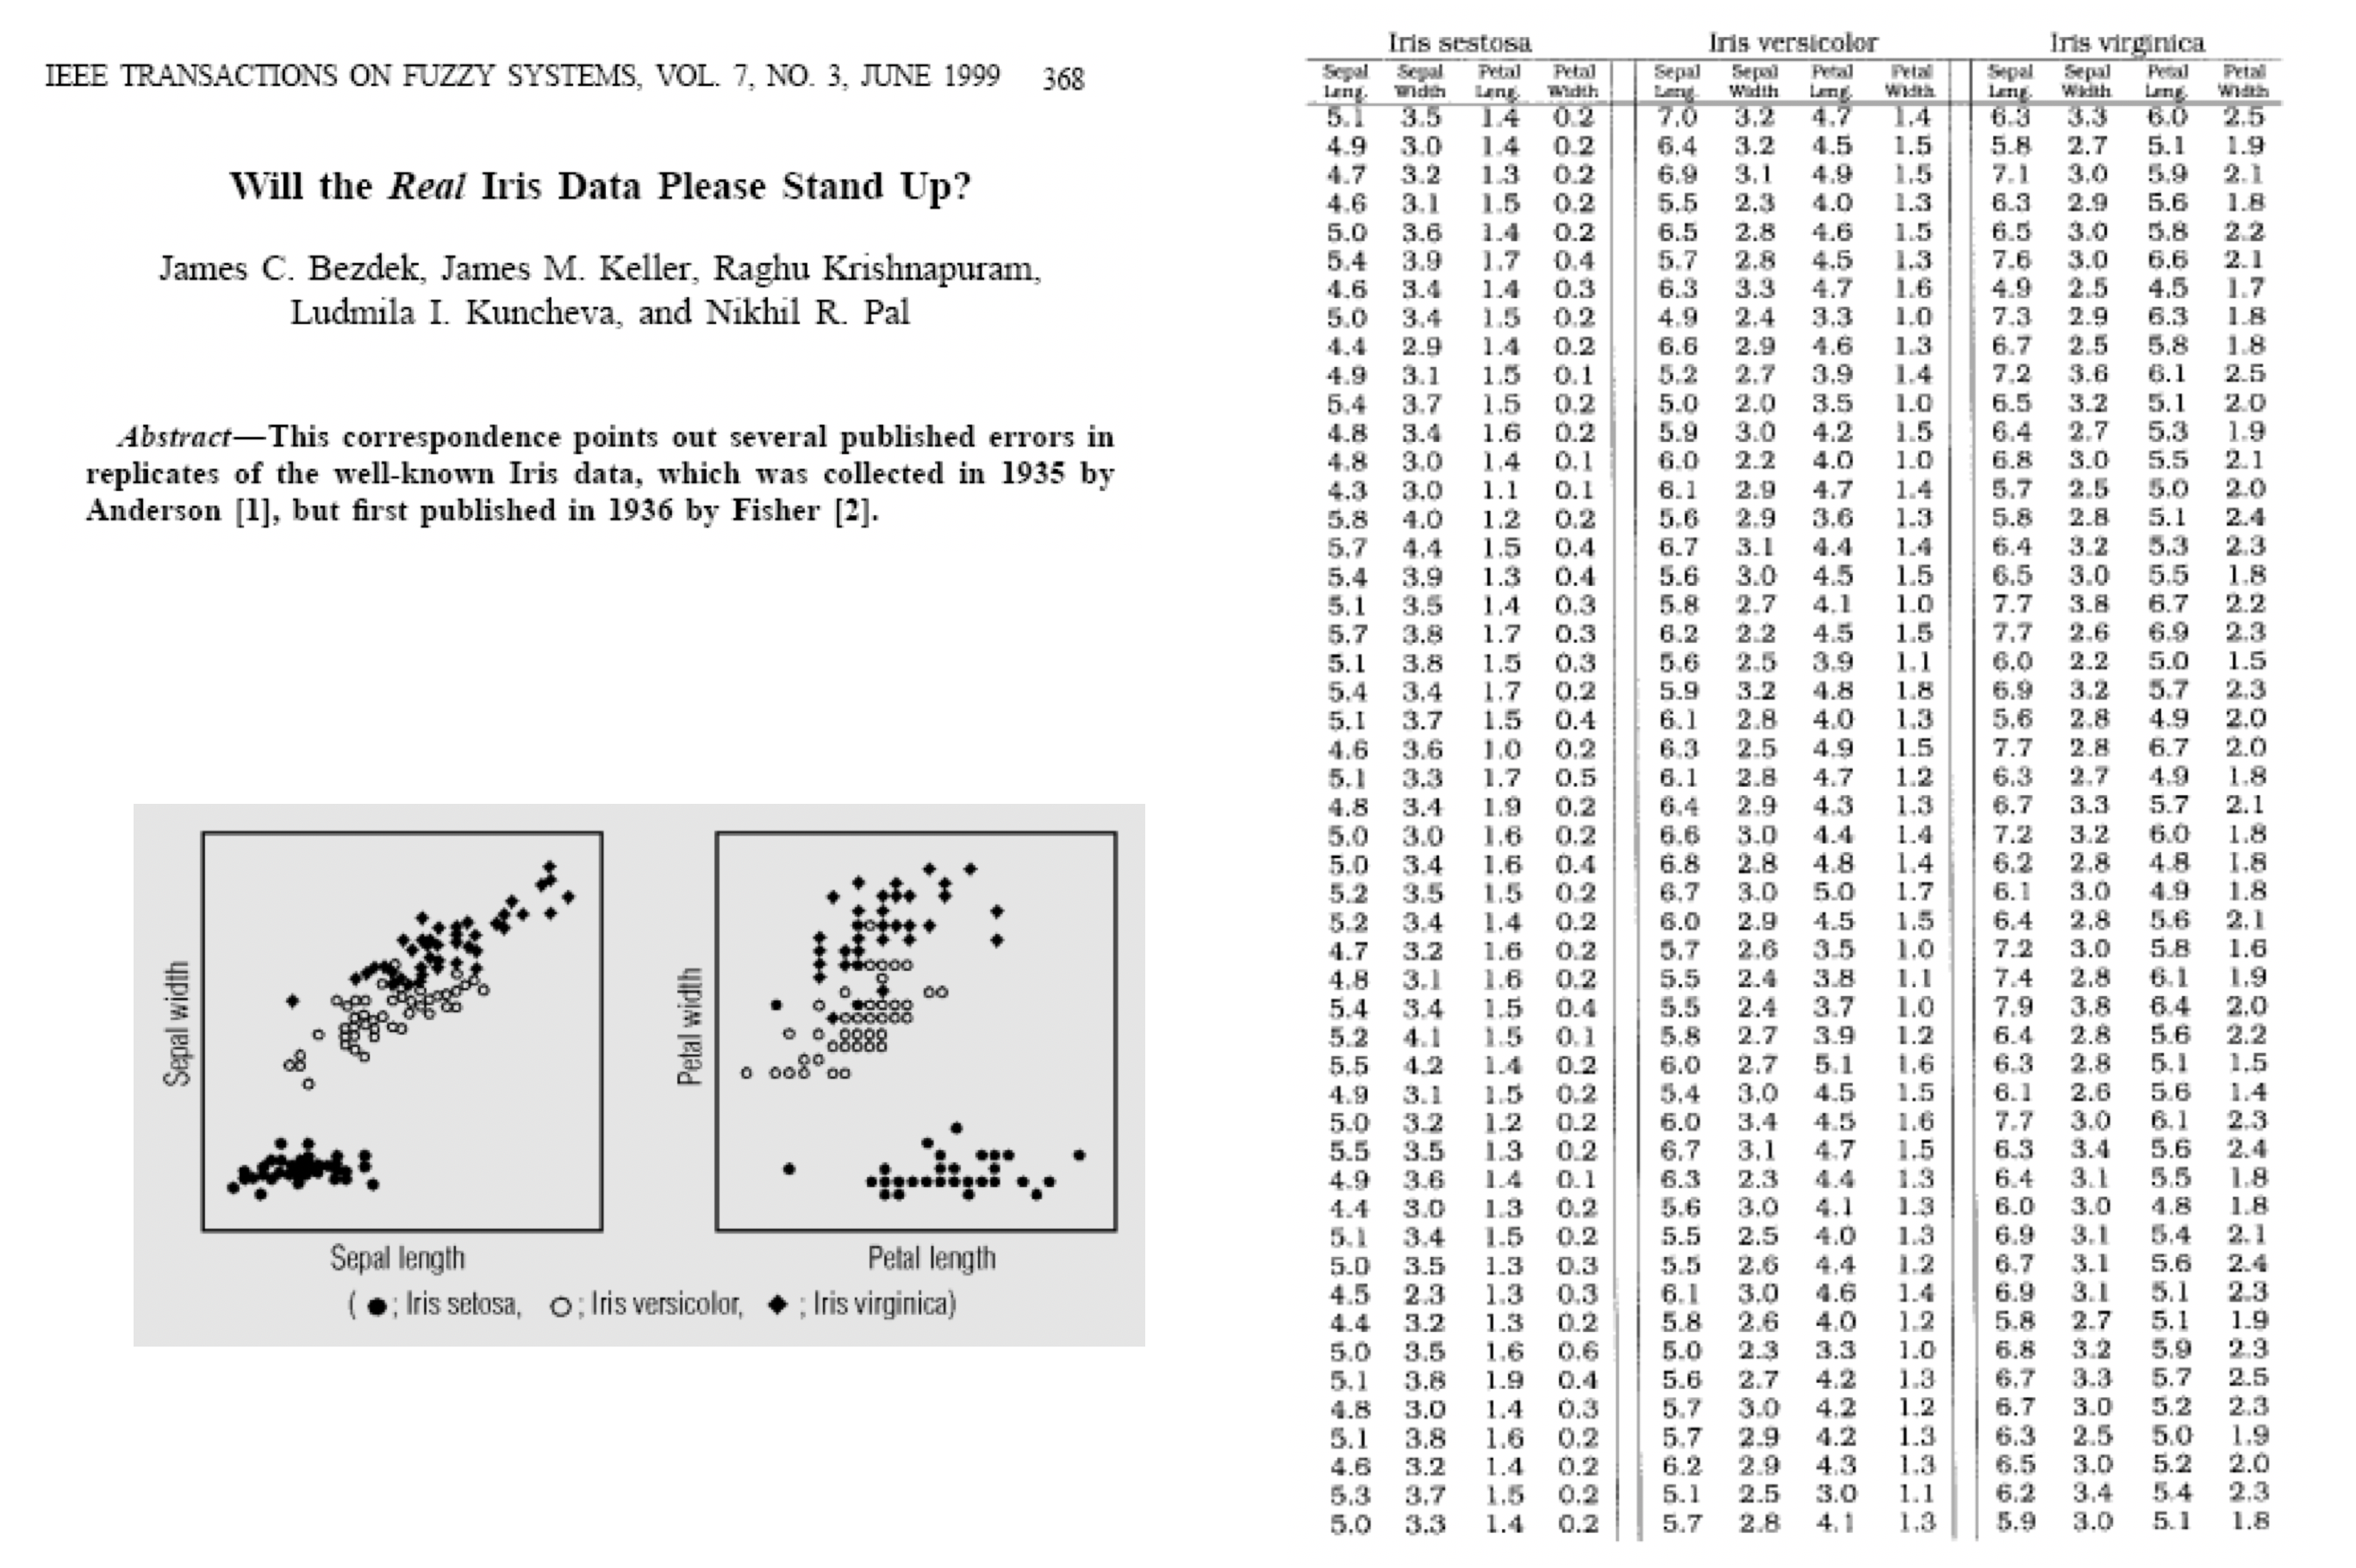

In [15]:
# load image
from IPython.display import Image
Image('./assets/iris_data_tabular.png', width=900)

The table in the image is sorted into three tables based on the name of the flower. Each table then present the values from the other four columns. We therefore start by sorting them based on their name.

In [ ]:
setosa = iris[iris.Name == 'Iris-setosa'].drop(['Name'], axis=1)
versicolor = iris[iris.Name == 'Iris-versicolor'].drop(['Name'], axis=1)
virginica = iris[iris.Name == 'Iris-virginica'].drop(['Name'], axis=1)

n = len(setosa)

We then print each table using a for loop

In [ ]:
print('\t   Iris setosa', '     Iris versicolor', '  Iris virginica')
for k in range(n):
    print(k+1, '\t', setosa.values[k,:], versicolor.values[k,:], virginica.values[k,:])

We can also access a group of values according to column names using `.loc` and matrix transpose (`.T`)

In [ ]:
# setosa.loc[:,['SepalLength','SepalWidth', 'PetalLength', 'PetalWidth']].T
setosa.loc[:,['SepalLength','SepalWidth']].T

## Create graphs from data

Plotting in python is usually done through **matplotlib's pyplot**, which we will use later on, but we can use pandas' API for this:
We can make subplots plotting values from different columns against each other like this:

In [ ]:
iris.plot.scatter('SepalLength', 'SepalWidth')

iris.plot.scatter('PetalLength', 'PetalWidth')


Do you make some observations from these plots?

**Plotting using seaborn __[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)__**<br>


## Plotting with Seaborn
The Seaborn library deals smoothly with pandas dataframes, and the plots are more visually appealing. Let's plot each species in a different color:

In [ ]:
g = sns.pairplot(iris, height=6, x_vars=["SepalLength"], y_vars=["SepalWidth"], hue="Name",
                 markers=["s", "o", "D"])

# hue determines which column is to be used to define color

Or pairplots as a matrix plot with color-encoded class-specific histograms on the diagonal

In [ ]:
g = sns.pairplot(iris, vars=["SepalLength", "SepalWidth"], hue="Name", diag_kind="hist")

and with color-coded class-specific [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation)-estimated probability densities on the diagonal

In [ ]:
g = sns.pairplot(iris, hue="Name", palette="husl",  markers=["s", "o", "D"], diag_kind="kde")
# not specifying the columns automatically uses all of them

**Question:** 
 - **Which one of three flowers is easiest to differentiate from the other two flowers based on its Sepal and Petal measurements ?**

# Statistics using Pandas <a name="statistics"></a>

Let us again look at the seminal Fisher [article](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1469-1809.1936.tb02137.x) based on this data:

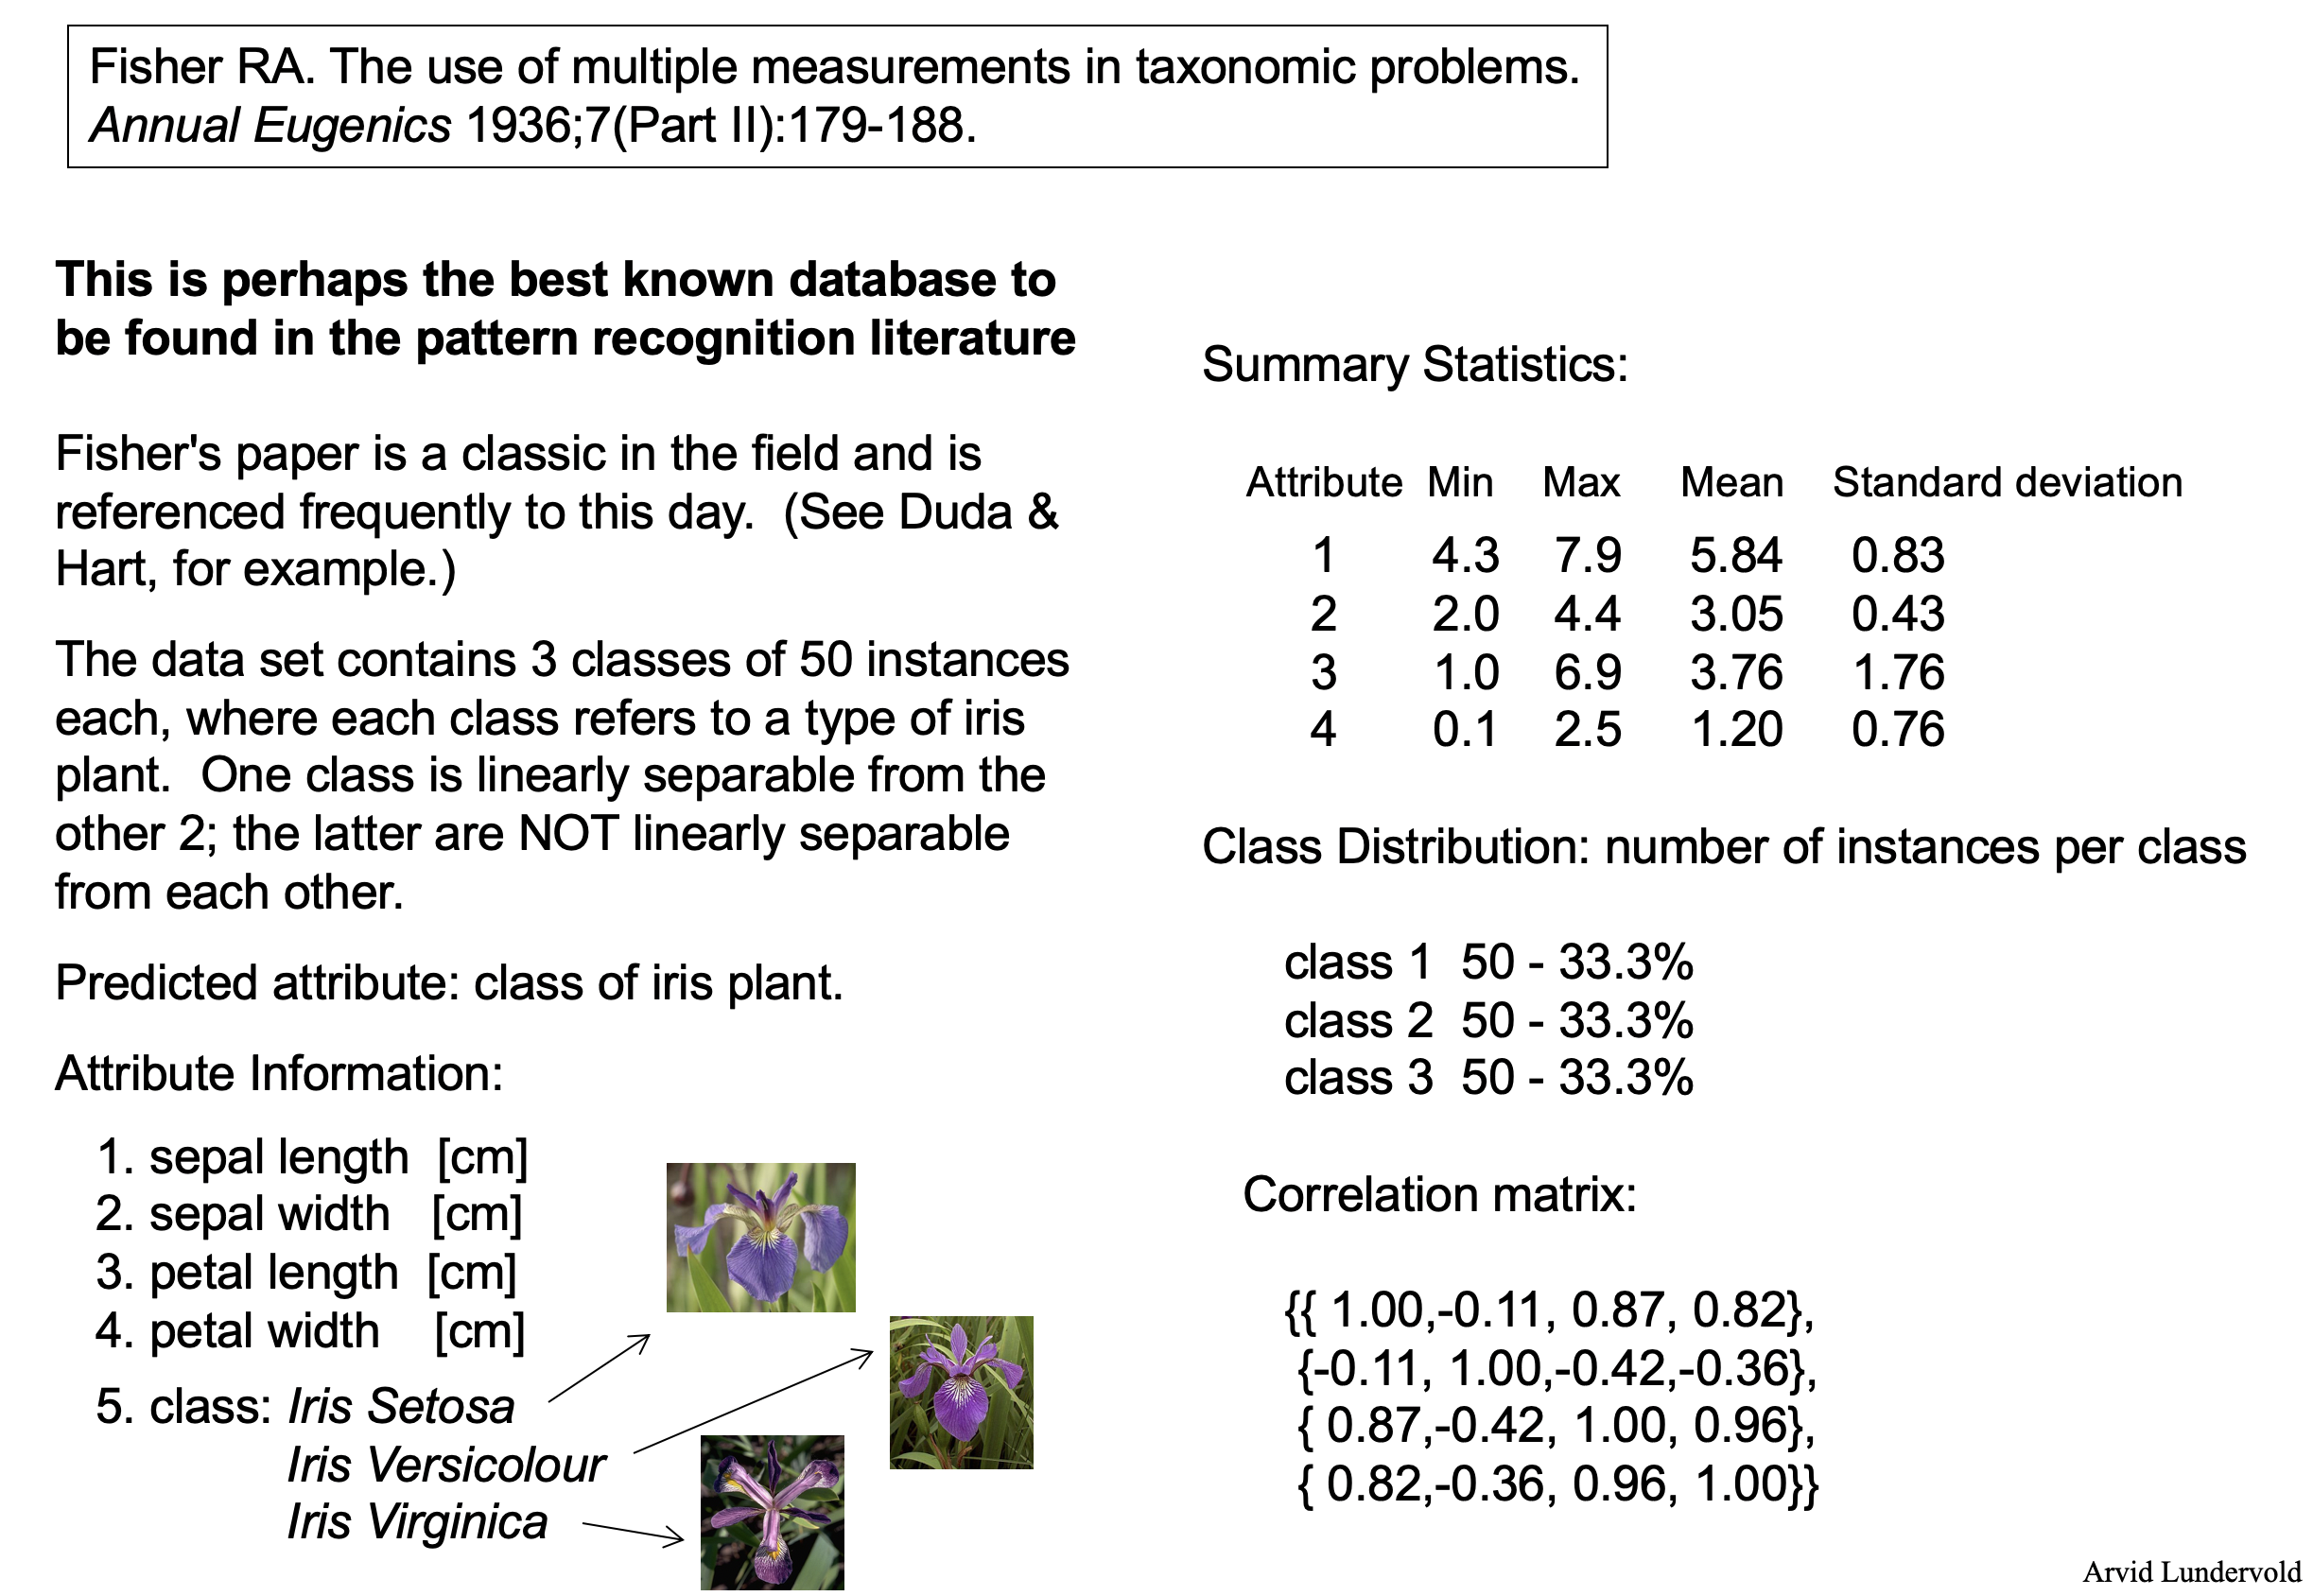

In [16]:
# load image
from IPython.display import Image
Image('./assets/iris_data_statistics.png', width=900)

We can use `.describe()` to calculate simple **descriptive statistics** for the dataset (rounding to 3 decimals):

In [ ]:
iris.describe().round(3).T

Computing the **pairwise correlation of columns** (features) using `.corr()`. Variations of correlation measure is also adjustable (e.g. ‘pearson’ (default), ‘kendall’, or ‘spearman’) 

In [ ]:
iris.corr().round(2)

Including only string columns in a DataFrame description

In [ ]:
# like we explained above, object in this case means text
iris.describe(include=[np.object])

In our case same as excluding numeric columns from a DataFrame description

In [ ]:
iris.describe(exclude=[np.number])

In order to get statistical values for the different types of iris flowers we can split the object (iris DataFrame) into groups (species)

In [ ]:
grouped = iris.groupby('Name')

In [ ]:
grouped.groups

Describe the group-wise `PetalLength` summary statistics

In [ ]:
print('PetalLength:')
grouped['PetalLength'].describe()

Iterating through the grouped data is very natural

In [ ]:
for name, group in grouped:
    print(name,':')
    print(group.describe().round(2).head(3))

**Group-wise feature correlations**

In [ ]:
iris.groupby('Name').corr().round(3)

DataFrame has an `assign()` method that allows you to easily create new columns that are potentially derived from existing columns. Here we add a columns with the ratio between SepalWidth and SepalLength.

In [ ]:
iris.assign(sepal_ratio = iris['SepalWidth'] / iris['SepalLength']).head().round(3)

`assign` always returns a copy of the data, leaving the original DataFrame untouched, e.g.

<div class='alert alert-info'>
<h4>Digression: lambda functions</h4>

Lambda functions (anonymous functions) are equivalent to regular functions, only the syntax is different. We only make use of them if we need a function once. Thus the two below functions are equivalent

```python
def add_one(a): return a + 1

add_one = lambda a : a + 1

```

<div class='alert alert-warning'>
<h4>Exercise 5.</h4>Make a new column which is the sum of all the measurements.

In [ ]:
# Ex5


In [ ]:
# %load solutions/ex2_5.py

In [ ]:
iris.head(2)

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using `assign`  in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

In [ ]:
(iris.query('SepalLength > 5')
 .assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength,
         PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
 .plot(kind='scatter', x='SepalRatio', y='PetalRatio'))

<div class='alert alert-warning'>
<h4>Exercise 6.</h4> Compute the mean and standard deviation of the SepalWidth / SepalLength ratio.

Hint: use the Tab trick to find the relevant methods, or just make an online search.

In [ ]:
# Ex6


In [ ]:
# %load solutions/ex2_6.py

# PART 2 - extra stuff <a name="part2"></a>

In Part I you learned about some basic functionalities, how to access contents from your dataframe, indexing, grouping, and how to modify it, making quick plots and even how to create new features based on old ones. In this section, we will go through much of the same material, but more bottom-up, from the very simple data structures to how to efficiently work with them. There will then be some overlap in the material.

<br>- taken from "10 Minutes to pandas"
(https://pandas.pydata.org/pandas-docs/stable/10min.html)

You can see more complex recipes in the __[Cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html)__

### Object creation <a name="objectcreation"></a>

See also __[Intro to Data Structures](https://pandas.pydata.org/pandas-docs/stable/dsintro.html)__

So far we have looked at dataframes. These are analogous to (2D) matrices. The analogy to (1D) vectors are
__[Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)__ : a labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. 
Creating a Series by passing a list of values, letting pandas create a default integer index:

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8])
s

Creating a __[DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)__ by passing a NumPy array, with a datetime index and labeled columns:

In [ ]:
dates = pd.date_range('20130101', periods=6)
dates

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

 - Dict of 1D ndarrays, lists, dicts, or Series
 - 2-D numpy.ndarray
 - [Structured or record ndarray](https://docs.scipy.org/doc/numpy/user/basics.rec.html)
 - A `Series`
 - Another `DataFrame`
 
Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame.

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

Creating a DataFrame by passing a dict of objects that can be converted to series-like

In [ ]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

The columns of the resulting DataFrame have different dtypes.

In [ ]:
df2.dtypes

If you’re using IPython (Jupyter notebook), tab completion for column names (as well as public attributes) is automatically enabled, ie.  df2.`<TAB>` <br> Here’s a subset of the attributes that will be completed:

```python
df2.<TAB>

 df2.A     df2.E       df2.add            df2.aggregate   df2.append        df2.as_matrix
 df2.B     df2.F       df2.add_prefix     df2.align       df2.apply         df2.asfreq
 df2.C     df2.T       df2.add_suffix     df2.all         df2.applymap      df2.asof       >  
 df2.D     df2.abs     df2.agg            df2.any         df2.as_blocks     df2.assign
```

As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` is there as well; the rest of the attributes have been truncated for brevity.

### Viewing Data <a name="viewing"></a>

Here is how to view the top and bottom rows of the frame:

In [ ]:
df.head()

In [ ]:
df.tail()

Display the index, columns, and the underlying NumPy data:

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.values

`describe()` shows a quick statistic summary of your data:

In [ ]:
df.describe()

### Selection <a name="selection"></a>

See also the indexing documentation __[Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html)__ 
and  __[MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html)__

#### Getting

Selecting a single column, which yields a Series, equivalent to `df.A`

In [ ]:
df['A']

Selecting via `[]`, which slices the rows

In [ ]:
df[0:3]

#### Selection by Label

For more, see __[Selection by Label](https://pandas.pydata.org/pandas-docs/stable/indexing.html)__

In [ ]:
# For getting a cross section using a label

df.loc[dates[0]]

In [ ]:
# Selecting on a multi-axis by label

df.loc[:,['A','B']]

In [ ]:
# Showing label slicing, both endpoints are included

df.loc['20130102':'20130104',['A','B']]

In [ ]:
# Reduction in the dimensions of the returned object

df.loc['20130102',['A','B']]

In [ ]:
# For getting a scalar value

df.loc[dates[0],'A']

In [ ]:
# For getting fast access to a scalar (equivalent to the prior method)

df.at[dates[0],'A']

#### Selection by Position

See more in __[Selection by Position](https://pandas.pydata.org/pandas-docs/stable/indexing.html)__

Select via the position of the passed integers

In [ ]:
df.iloc[3]

By integer slices, acting similar to numpy/python

In [ ]:
df.iloc[3:5,0:2]

By lists of integer position locations, similar to the numpy/python style

In [ ]:
df.iloc[[1,2,4],[0,2]]

For slicing rows explicitly

In [ ]:
df.iloc[1:3,:]

For slicing columns explicitly

In [ ]:
df.iloc[:,1:3]

For getting a value explicitly

In [ ]:
df.iloc[1,1]

For getting fast access to a scalar (equivalent to the prior method)

In [ ]:
df.iat[1,1]

#### Boolean Indexing

Using a single column’s values to select data

In [ ]:
df[df.A > 0]

Selecting values from a DataFrame where a boolean condition is met

In [ ]:
df[df > 0]

Using the `isin()` method for filtering

In [ ]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

In [ ]:
df2[df2['E'].isin(['two','four'])]

#### Setting

Setting a new column automatically aligns the data by the indexes

In [ ]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

In [ ]:
df['F'] = s1
df

Setting values by label

In [ ]:
df.at[dates[0],'A'] = 0
df

Setting values by position

In [ ]:
df.iat[0,1] = 0
df

Setting by assigning with a NumPy array

In [ ]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [ ]:
df

A `where` operation with setting

In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

### Missing data <a name="missing"></a>

Pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the __[Missing Data section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)__

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

To drop any rows that have missing data

In [ ]:
df1.dropna(how='any')

Filling missing data

In [ ]:
df1.fillna(value=5)

To get the boolean mask where values are `nan`

In [ ]:
pd.isna(df1)

### Operations <a name="operations"></a>

See the __[Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/basics.html)__

#### Stats

Operations in general *exclude* missing data

Performing a descriptive statistic

In [ ]:
df.mean()

Same operation on the other axis

In [ ]:
df.mean(1)

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

In [ ]:
df.sub(s, axis='index')

#### Apply

Applying functions to the data

In [ ]:
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x: x.max() - x.min())

#### Histogramming

See more at __[Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/basics.html)__

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10)); s

In [ ]:
s.value_counts()

#### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). <br>
See more at __[Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/text.html)__

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

### Merging  <a name="merging"></a>

#### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.<br>
See the __[Merging section](https://pandas.pydata.org/pandas-docs/stable/merging.html)__

Concatenating pandas objects together with `concat()`:

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4)); df

In [ ]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

In [ ]:
 pd.concat(pieces)

#### Join

SQL style merges. See the __[Database style joining](https://pandas.pydata.org/pandas-docs/stable/merging.html)__ section

In [ ]:
left = pd.DataFrame({'key': ['bar', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar','bar'], 'rval': [4, 5, 6]})

print('left:\n', left)
print('\nright:\n', right)

In [ ]:
pd.merge(left, right, on='key')

#### Append

Append rows to a dataframe. See the __[Appending](https://pandas.pydata.org/pandas-docs/stable/merging.html)__ section.

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D']); df

In [ ]:
s = df.iloc[3]; s

In [ ]:
df.append(s, ignore_index=True)

### Grouping  <a name="grouping"></a>

By “group by” we are referring to a process involving one or more of the following steps:

 - **Splitting** the data into groups based on some criteria
 - **Applying** a function to each group independently
 - **Combining** the results into a data structure

See the __[Grouping section](https://pandas.pydata.org/pandas-docs/stable/groupby.html)__

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

Grouping and then applying the `min()` function to the resulting groups

In [ ]:
df.groupby('A').min()

Grouping by multiple columns forms a hierarchical index, and again we can apply the `min()` function

In [ ]:
df.groupby(['A','B']).min()

### Reshaping  <a name="reshaping"></a>

See the sections on __[Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical)__ and __[Reshaping](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking)__

#### Stack

In [ ]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
tuples

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

In [ ]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B']); df

In [ ]:
df2 = df[:4]
df2

The __[stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack)__ method “compresses” a level in the DataFrame’s columns

In [ ]:
stacked = df2.stack()
stacked

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is __[unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack)__, which by default unstacks the **last level**:

In [ ]:
stacked.unstack()

In [ ]:
stacked.unstack(1)

In [ ]:
stacked.unstack(0)

#### Pivot Tables

See the section on __[Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot)__

In [ ]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})
df

We can produce pivot tables from this data very easily:

In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

### Time Series <a name="timeseries"></a>

Pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the __[Time Series section](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)__

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S'); rng[:3]

In [ ]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng); ts[:3]

In [ ]:
ts.resample('5Min').sum()

Time zone representation:

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D'); rng[:3]

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), rng); ts

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

Converting to another time zone:

In [ ]:
ts_utc.tz_convert('US/Eastern')

Converting between time span representations:

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq='M'); rng[:3]

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index=rng); ts

In [ ]:
ps = ts.to_period(); ps

In [ ]:
ps.to_timestamp()

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [ ]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV'); prng[:3]

In [ ]:
ts = pd.Series(np.random.randn(len(prng)), prng); ts[:3]

In [ ]:
ts[-3:]

In [ ]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

### Categoricals <a name="categoricals"></a>

Pandas can include categorical data in a `DataFrame`. For full docs, see the __[categorical introduction](https://pandas.pydata.org/pandas-docs/stable/categorical.htm)__ and the __[API documentation](https://pandas.pydata.org/pandas-docs/stable/api.html)__

In [ ]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

Convert the raw grades to a categorical data type

In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

Rename the categories to more meaningful names (assigning to `Series.cat.categories` is inplace!)

In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

Reorder the categories and simultaneously add the missing categories (methods under `Series .cat` return a new `Series` by default)

In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

Sorting is per order in the categories, not lexical order

In [ ]:
df.sort_values(by="grade")

Grouping by a categorical column also shows empty categories

In [ ]:
df.groupby("grade").size()

### Plotting <a name="plotting"></a>

See the __[Plotting docs](https://pandas.pydata.org/pandas-docs/stable/visualization.html)__

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On a DataFrame, the `plot()` method is a convenience to plot all of the columns with labels

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
columns=['A', 'B', 'C', 'D']) 

df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

### Getting Data In/Out <a name="datainout"></a>

In [ ]:
import tables # pytables is needed to read and write hdf5 files
import openpyxl # is used to read and write MS Excel files

#### CSV

[`Writing to a csv file`](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv) 

In [ ]:
df.to_csv('./testdata/foo.csv')

[`Reading from a csv file`](https://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [ ]:
pd.read_csv('./testdata/foo.csv').head()

To get help on __read_csv__, type: `read_csv?`

In [ ]:
# read_csv?

#### HDF5

Reading and writing to [`HDFStores`](https://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [ ]:
# pytables is needed
df.to_hdf('./testdata/foo.h5','df')

Reading from a HDF5 Store

In [ ]:
pd.read_hdf('./testdata/foo.h5','df').head()

#### Excel

Reading and writing to [`MS Excel`](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [ ]:
# openpyxl is needed
df.to_excel('./testdata/foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [ ]:
pd.read_excel('./testdata/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

## Going further <a name="going"></a>

-  A handy Pandas *cheat sheet*:  http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
-  Pandas: .head() to .tail() https://www.youtube.com/watch?v=7vuO9QXDN50  (1:26) <br> 
    w/GitHub repo: https://github.com/TomAugspurger/pydata-chi-h2t
-  Very instructive tutorials:  http://pandas.pydata.org/pandas-docs/stable/tutorials.html
